In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
input_excel_filepath = './Input_FE_Assignment_1/Powells Creek AMS.xlsx'
input_sheet_name = 'Sheet1'
output_dir = './Output_FE_Assignment_1/'
# case 1: 11-year data
input_1st_sample = [1960, 1971]
input_2nd_sample = [1970, 1981]
input_3rd_sample = [1980, 1991]
# case 2: 10-year data - forward
input_1st_sample_mod1 = [1960, 1970]
input_2nd_sample_mod1 = [1970, 1980]
input_3rd_sample_mod1 = [1980, 1990]
# case 3: 10-year data - backward
input_1st_sample_mod2 = [1961, 1971]
input_2nd_sample_mod2 = [1971, 1981]
input_3rd_sample_mod2 = [1981, 1991]

print(
    input_excel_filepath,
    input_sheet_name,
    output_dir,
    # case 1: 11-year data
    input_1st_sample,
    input_2nd_sample,
    input_3rd_sample,
    # case 2: 10-year data - forward
    input_1st_sample_mod1,
    input_2nd_sample_mod1,
    input_3rd_sample_mod1,
    # case 3: 10-year data - backward
    input_1st_sample_mod2,
    input_2nd_sample_mod2,
    input_3rd_sample_mod2,
    sep='\n'
    )

./Input_FE_Assignment_1/Powells Creek AMS.xlsx
Sheet1
./Output_FE_Assignment_1/
[1960, 1971]
[1970, 1981]
[1980, 1991]
[1960, 1970]
[1970, 1980]
[1980, 1990]
[1961, 1971]
[1971, 1981]
[1981, 1991]


In [49]:
case_1 = [input_1st_sample, input_2nd_sample, input_3rd_sample,]
case_2 = [input_1st_sample_mod1, input_2nd_sample_mod1, input_3rd_sample_mod1]
case_3 = [input_1st_sample_mod2, input_2nd_sample_mod2, input_3rd_sample_mod2]

print(
    case_1,
    case_2,
    case_3,
    sep='\n'
    )

[[1960, 1971], [1970, 1981], [1980, 1991]]
[[1960, 1970], [1970, 1980], [1980, 1990]]
[[1961, 1971], [1971, 1981], [1981, 1991]]


# full data

In [99]:
data = pd.read_excel(io=input_excel_filepath, sheet_name=input_sheet_name, header=None, names=['year', 'flow_rate'])
data.to_csv(path_or_buf='{}full_data.csv'.format(output_dir), header=False, index=False)
data

,year,flow_rate
0,1958,15.98
1,1959,48.16
2,1960,10.75
3,1961,7.01
4,1962,19.99
5,1963,32.97
6,1964,25.30
7,1965,8.79
8,1966,12.56
9,1967,17.20


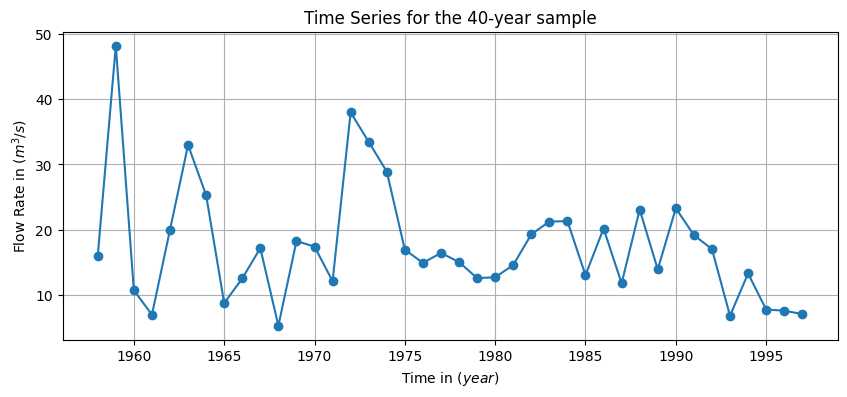

In [100]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(
    data.year.to_numpy(), 
    data.flow_rate.to_numpy(),
    '-o'
    )

ax.grid(visible=True)
ax.set_title(label='Time Series for the {}-year sample'.format(len(data)))
ax.set_xlabel(xlabel='Time in ($year$)')
ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
fig.savefig(fname='{}time_series_40_year_sample.png'.format(output_dir))

# data case 1

In [106]:
data_c1 = [data.iloc[data[data.year == ind[0]].index[0]:data[data.year == ind[1]].index[0]] for ind in case_1]
ind_ini = [ind[0] for ind in case_1]
ind_fin = [ind[-1]-1 for ind in case_1]
ind_enu = range(len(data_c1))
[ind1.to_csv(
    path_or_buf='{}data_case_1_{}_{}_{}.csv'.format(output_dir, ind2, ind3, ind4),
    header=False,
    index=False
    ) for ind1, ind2, ind3, ind4 in zip(data_c1, ind_enu, ind_ini, ind_fin)]
data_c1 = pd.concat(objs=[ind.reset_index(drop=True) for ind in data_c1], axis=1)
data_c1

,year,flow_rate,year,flow_rate,year,flow_rate
0,1960,10.75,1970,17.44,1980,12.74
1,1961,7.01,1971,12.14,1981,14.61
2,1962,19.99,1972,37.97,1982,19.31
3,1963,32.97,1973,33.45,1983,21.26
4,1964,25.30,1974,28.91,1984,21.33
5,1965,8.79,1975,16.96,1985,13.07
6,1966,12.56,1976,14.94,1986,20.20
7,1967,17.20,1977,16.46,1987,11.81
8,1968,5.33,1978,15.07,1988,23.10
9,1969,18.26,1979,12.61,1989,13.94


In [117]:
[(ind_1, ind_2) for ind_1, ind_2 in zip(['{}_{}'.format(ind1, ind2) for ind1, ind2 in zip(ind_ini, ind_fin)],['{}_{}'.format(ind1, ind2) for ind1, ind2 in zip(ind_ini, ind_fin)])]

[('1960_1970', '1960_1970'),
 ('1970_1980', '1970_1980'),
 ('1980_1990', '1980_1990')]

In [110]:
data_c1.columns

Index(['year', 'flow_rate', 'year', 'flow_rate', 'year', 'flow_rate'], dtype='object')

In [107]:
data_c1.columns = pd.MultiIndex.from_tuples(tuples=[(,'year'), 'flow_rate', 'year', 'flow_rate', 'year', 'flow_rate'])

Index(['year', 'flow_rate', 'year', 'flow_rate', 'year', 'flow_rate'], dtype='object')

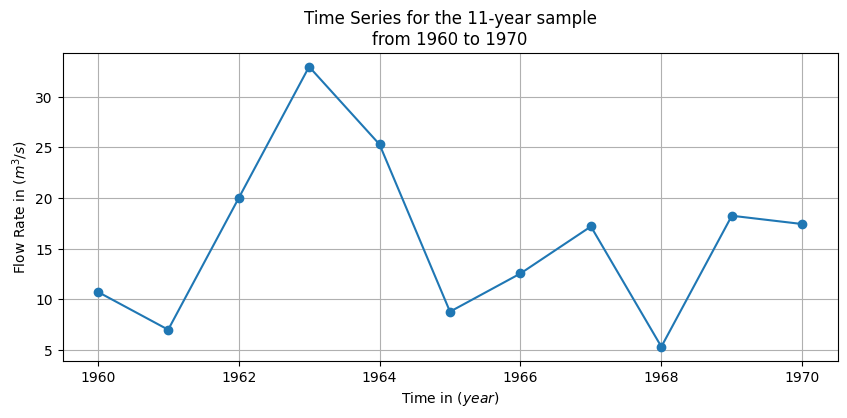

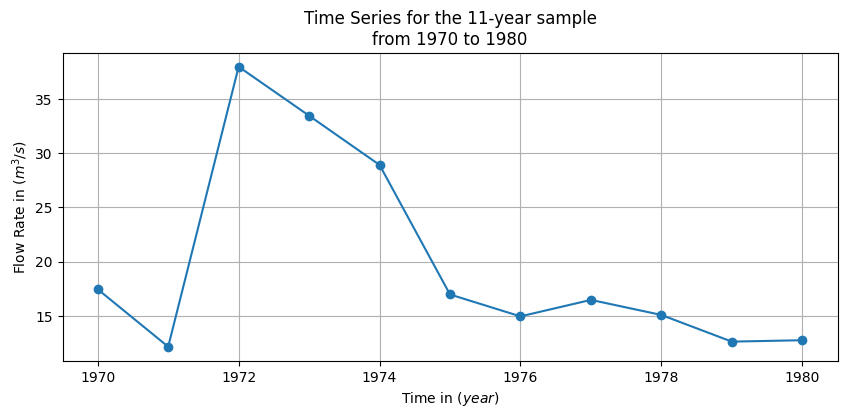

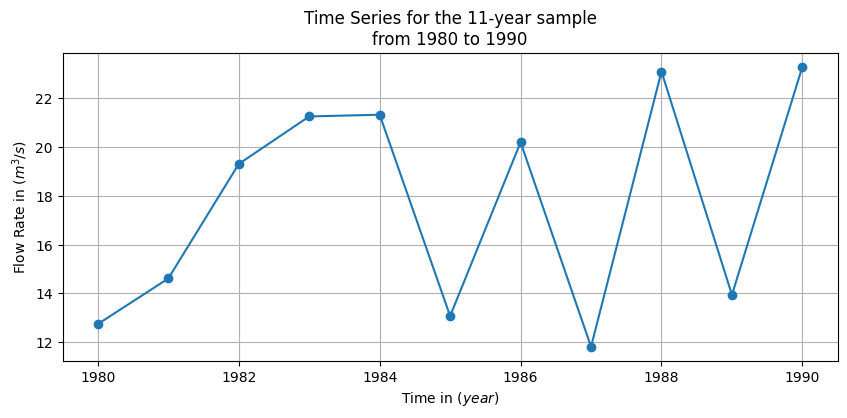

In [105]:
for ind1, ind2, ind3 in zip(data_c1, ind_ini, ind_fin):
    fig, ax = plt.subplots(figsize=(10,4))

    ax.plot(
        ind1.year.to_numpy(), 
        ind1.flow_rate.to_numpy(),
        '-o'
        )

    ax.grid(visible=True)
    ax.set_title(label='Time Series for the {}-year sample\nfrom {} to {}'.format(
        len(ind1),
        ind2, 
        ind3
        ))
    ax.set_xlabel(xlabel='Time in ($year$)')
    ax.set_ylabel(ylabel='Flow Rate in ($m^3/s$)')
    fig.savefig(fname='{}time_series_case_1_{}_year_sample_{}_{}.png'.format(
        output_dir, 
        len(ind1), 
        ind2, 
        ind3
        ))

# data case 2

In [ ]:
data_c2 = [data.iloc[data[data.year == ind[0]].index[0]:data[data.year == ind[1]].index[0]] for ind in case_2]
ind_ini = [ind[0] for ind in case_2]
ind_fin = [ind[-1]-1 for ind in case_2]
ind_enu = range(len(data_c2))
[ind1.to_csv(
    path_or_buf='{}data_case_2_{}_{}_{}.csv'.format(output_dir, ind2, ind3, ind4),
    header=False,
    index=False
    ) for ind1, ind2, ind3, ind4 in zip(data_c2, ind_enu, ind_ini, ind_fin)]